#### Imports

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

#### Load CSV data into a pandas dataframe

In [50]:
df = pd.read_csv('./output_data/case_data.csv')

#### Abstract Length Descriptive Statistics

In [51]:
# Calculate lengths of abstracts
df['abstract_length'] = df['abstract'].apply(len)

# Calculate descriptive statistics
abstract_length_stats = df['abstract_length'].describe()

# Print the statistics
print(abstract_length_stats)

count    46666.000000
mean       989.909549
std        381.994588
min          1.000000
25%        762.000000
50%        968.000000
75%       1174.000000
max      15462.000000
Name: abstract_length, dtype: float64


#### Claims Length Descriptive Statistics

In [52]:
# Calculate lengths of claims
df['claims_length'] = df['claims'].apply(len)

# Calculate descriptive statistics
claims_length_stats = df['claims_length'].describe()

# Print the statistics
print(claims_length_stats)

count    4.666600e+04
mean     6.468592e+03
std      1.130828e+04
min      7.000000e+00
25%      2.816000e+03
50%      4.732000e+03
75%      7.844000e+03
max      1.002938e+06
Name: claims_length, dtype: float64


#### Abstract Length Normal Distribution

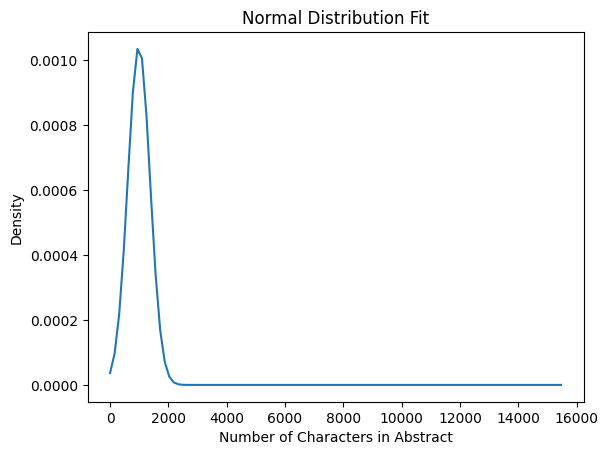

In [31]:
# Fit a normal distribution to the data
mu, std = stats.norm.fit(df['abstract_length'])

# Create the range of values for the x-axis
xmin, xmax = min(df['abstract_length']), max(df['abstract_length'])
x = np.linspace(xmin, xmax, 100)

# Calculate the normal distribution probability density function
p = stats.norm.pdf(x, mu, std)

# Plot the normal distribution curve
plt.plot(x, p)
plt.title('Normal Distribution Fit')
plt.xlabel('Number of Characters in Abstract')
plt.ylabel('Density')
plt.show()

#### Abstract Length histogram for the 99th percentile of the data

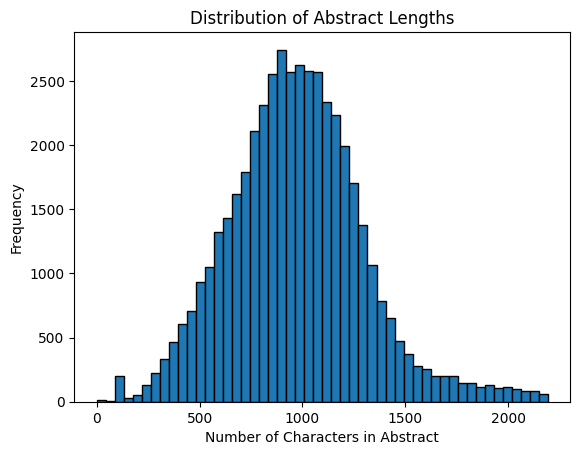

In [32]:
# Plot a histogram of the abstract lengths focusing on a narrower range
max_length = df['abstract_length'].quantile(0.99)  # Focusing on the 99th percentile
plt.hist(df[df['abstract_length'] <= max_length]['abstract_length'], bins=50, edgecolor='black')
plt.title('Distribution of Abstract Lengths')
plt.xlabel('Number of Characters in Abstract')
plt.ylabel('Frequency')
plt.show()


#### Analyze claims length of short abstracts

In [ ]:
# Filter abstracts that are 150 characters or less
short_abstracts = df[df['abstract_length'] <= 150]

In [56]:
df['claims_length'] = short_abstracts['claims'].apply(len)
claims_lengths = df['claims_length'].describe()
print(claims_lengths)

count       225.000000
mean       3671.213333
std        8608.386956
min          19.000000
25%         784.000000
50%        1274.000000
75%        3279.000000
max      101791.000000
Name: claims_length, dtype: float64


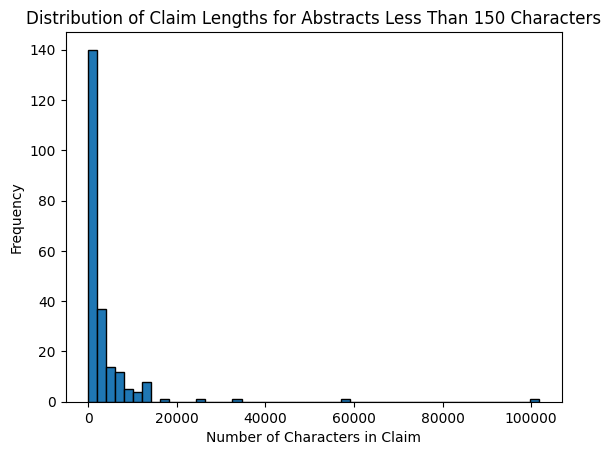

In [57]:
# Plot a histogram of the claim lengths for abstracts less than 150 characters
plt.hist(short_abstracts['claims_length'], bins=50, edgecolor='black')
plt.title('Distribution of Claim Lengths for Abstracts Less Than 150 Characters')
plt.xlabel('Number of Characters in Claim')
plt.ylabel('Frequency')
plt.show()

#### Replace short abstracts (length <= 150 chars) with corresponding claims text

In [58]:
# Replace abstracts shorter than 150 characters with their corresponding claims
df.loc[df['abstract_length'] < 150, 'abstract'] = df['claims']

In [59]:
# Save the modified DataFrame to a new CSV file
df.to_csv('./output_data/modified_case_data.csv', index=False)

#### Analyze abstract length of the modified data

In [69]:
modified_df = pd.read_csv('./output_data/modified_case_data.csv')
modified_df['abs_length'] = modified_df['abstract'].apply(len) 
print(modified_df['abs_length'].describe())

count     46666.000000
mean       1007.090001
std         729.553572
min          19.000000
25%         767.000000
50%         970.000000
75%        1176.000000
max      101791.000000
Name: abs_length, dtype: float64
